# Inferential Statistics (Part II)

![Image](./images/ab_testing.JPG)

---

## Hypothesis Tests

Differences between A (sample, experimental group) and B (population, control group):

- __Null hypothesis:__ The hypothesis that chance is to blame.

- __Alternative hypothesis:__ Counterpoint to the null (what you hope to prove).

- __p-value:__ The probability that the result is due to chance. You may find a nice explanation [here](https://youtu.be/9jW9G8MO4PQ).

- __Alpha:__ The probability threshold of "unusualness" that chance results must surpass for actual outcomes to be deemed statistically significant.

- __Type 1 Error:__ Mistakenly concluding an effect is real (when it is due to chance).

- __Type 2 Error:__ Mistakenly concluding an effect is due to chance (when it is real).

![Image](./images/error_types.JPG)

--

Use cases:

- Changes in digital products

- Medical treatments

- Marketing actions

- Social policies

--

Statistics and parameters according to data type:

- __Numeric feature:__ mean, standard deviation, variance of the values.

- __Categorical feature:__ mean, standard deviation, variance of the percentages.

In [1]:
# imports

import numpy as np
import pandas as pd

from statsmodels.stats.weightstats import ztest
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
house_prices = pd.read_csv('./datasets/house_prices.csv')
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

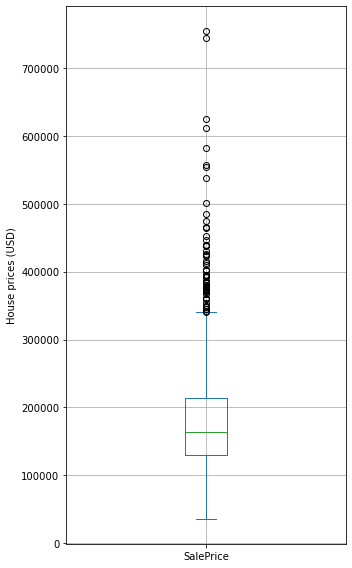

In [3]:
# House prices statistics

ax = house_prices['SalePrice'].plot.box(figsize=(5, 8))
ax.set_ylabel('House prices (USD)')
plt.tight_layout()
plt.grid()

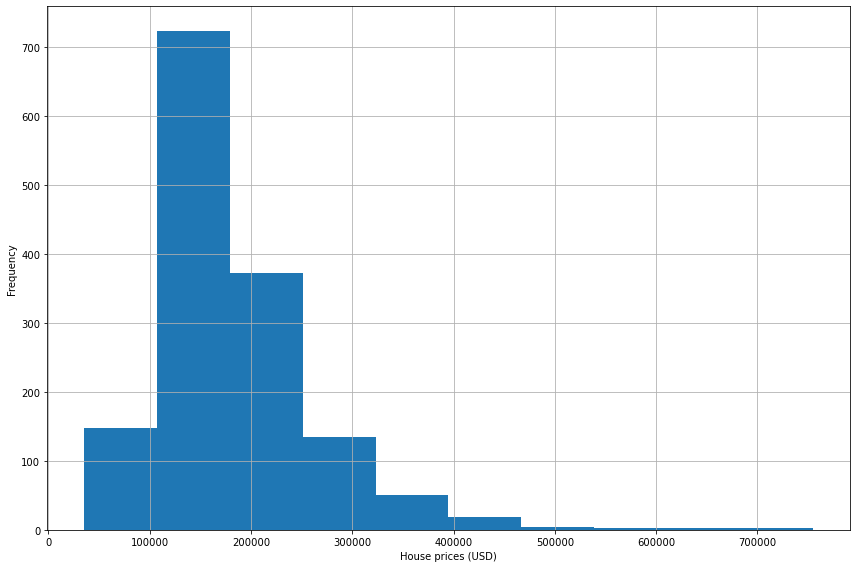

In [4]:
# House prices distribution

ax = house_prices['SalePrice'].plot.hist(figsize=(12, 8))
ax.set_xlabel('House prices (USD)')
plt.tight_layout()
plt.grid()

#### Does house prices have a Normal distribution?

![Image](./images/normal_distribution.JPG)

In [5]:
# House prices sampling

house_sampling_distribution = pd.Series([house_prices['SalePrice'].sample(31).mean() for _ in range(1460)])
house_sampling_distribution

0       164985.419355
1       174117.806452
2       177703.806452
3       191651.290323
4       201605.387097
            ...      
1455    186335.903226
1456    178144.967742
1457    175866.483871
1458    183353.774194
1459    180001.935484
Length: 1460, dtype: float64

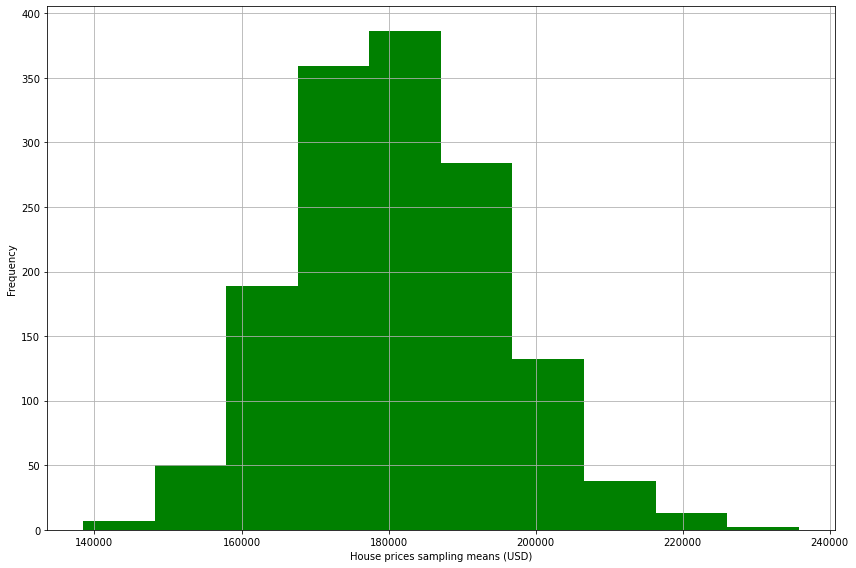

In [6]:
# House prices sampling distribution (checking that central limit theorem works!!!)

ax = house_sampling_distribution.plot.hist(figsize=(12, 8), color = "green")
ax.set_xlabel('House prices sampling means (USD)')
plt.tight_layout()
plt.grid()

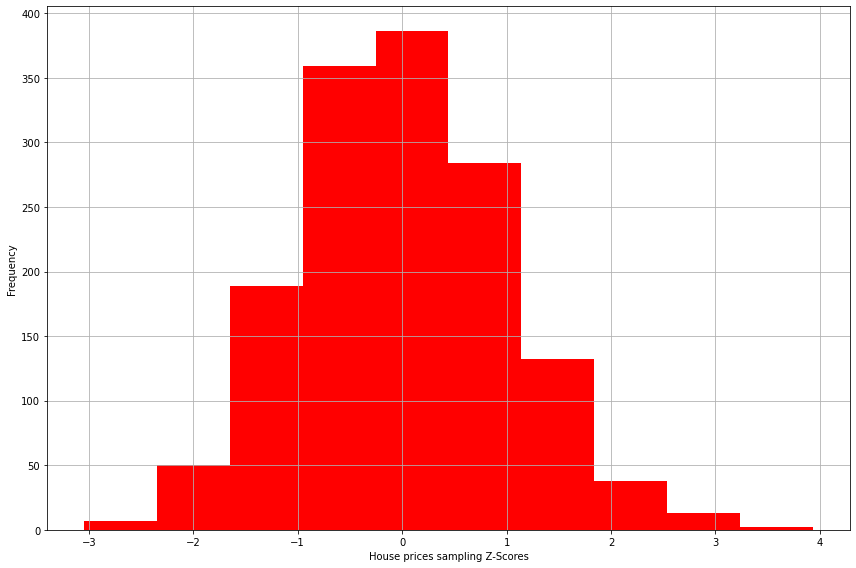

In [7]:
# House sampling prices Z-Score

house_sampling_prices_z_score = stats.zscore(house_sampling_distribution)
ax = house_sampling_prices_z_score.plot.hist(figsize=(12, 8), color = "red")
ax.set_xlabel('House prices sampling Z-Scores')
plt.tight_layout()
plt.grid()

---

### [Z-Test](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html)

When considering a __sample of data__, Z-score is used to measure the number of standard deviations by which the data points in the sample differ from the mean.

![Image](./images/z_score_formula.JPG)

When considering the __sampling distribution__, Z-score or Z-statistics is defined as the number of standard deviations between the sample mean and the population mean (mean of the sampling distribution).

![Image](./images/z_statistics_formula.JPG)

---

__Z-Test uses samples to draw conclusions about populations__. All Z tests assume your data follow a normal distribution. However, due to the central limit theorem, you can ignore this assumption when your sample is __large enough__.



---

### One sample Z-test

In [69]:
# Test parameters 

hypothesis_mean = 186000

sample_mean = house_prices['SalePrice'].mean()

alpha = 0.05

print(f'Hypothesis mean: {hypothesis_mean} USD',
      f'\nSample mean: {sample_mean} USD',
      f'\nProbability threshold: {alpha}')

Hypothesis mean: 186000 USD 
Sample mean: 180921.19589041095 USD 
Probability threshold: 0.05


#### Null and Alternative Hypothesis

Null Hypothesis (H0): Hypothesis mean = Sample mean

Alternative Hypothesis (H1): Hypothesis Mean is different from Sample mean

In [70]:
# Z-test (the probability that the sample mean is not within the 95% of the population mean)

Z_score, p_value = ztest(house_prices['SalePrice'].sample(800), value=hypothesis_mean)

print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

Z_score: -0.7708259711710289 
p-value: 0.4408100910796767


---

### Two samples Z-test (New vs. Old Houses)

In [71]:
house_prices['YearBuilt'].max()

2010

In [72]:
house_prices['YearBuilt'].min()

1872

In [75]:
# your-code

new_houses = house_prices[house_prices['YearBuilt'] >= 1990]
new_houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000


In [76]:
old_houses = house_prices[house_prices['YearBuilt'] < 1990]
old_houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [78]:
Z_score, p_value = ztest(x1=new_houses['SalePrice'], x2=old_houses['SalePrice'])

print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

Z_score: 25.97099401941119 
p-value: 1.0534597958277222e-148


In [79]:
new_houses['SalePrice'].mean()

238287.26497277676

In [80]:
old_houses['SalePrice'].mean()

146148.14411441144

---